In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime as dt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Create a DataFrame with data file names placed under directory  "01_11_2013---07_11_2013" with extension .txt

In [2]:
# glob  is used to return all file paths that match a specific pattern.
filespath = glob("C:\\Users\\a.abdallah\\Desktop\\Telecommuniction-Data\\01_11_2013---07_11_2013\\*.txt" )

#Set the column names for the data read
col_list = ['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn', 'callOut', 'internet']

#Initialize an empty dataframe
data = pd.DataFrame()
#Read file into Pandas DataFrame          
data = pd.concat((pd.read_csv(file, sep='\t',header=None, names=col_list, parse_dates=True) for file in filespath), ignore_index=True)

data

  

,gridID,timeInterval,countryCode,smsIn,smsOut,callIn,callOut,internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
...,...,...,...,...,...,...,...,...
37622893,9999,1383864000000,39,0.914131,1.428025,0.669794,NaN,17.813618
37622894,9999,1383864600000,0,0.092566,NaN,NaN,0.088767,NaN
37622895,9999,1383864600000,216,0.288963,NaN,NaN,NaN,NaN
37622896,9999,1383864600000,221,0.171990,NaN,NaN,0.085995,NaN


### Convert timeInterval column which has Epoch timestamps to UTC and then convert to Milan's local timezone and save it to column startTime

In [3]:
#tz_localize(None) returns local time format instead of "UTC+1:00" format
data['startTime'] = pd.to_datetime(data.timeInterval, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)

# create new columns 
data['Date'] = data['startTime'].dt.date
data['Time'] = data['startTime'].dt.time
data['hour'] = data['startTime'].dt.hour

#Drop timeInterval & startTime columns

data.drop(columns={'timeInterval' , 'startTime'},inplace=True)

data.dropna(inplace=True)
data

,gridID,countryCode,smsIn,smsOut,callIn,callOut,internet,Date,Time,hour
1,1,39,0.141864,0.156787,0.160938,0.052275,11.028366,2013-11-01,00:00:00,0
4,1,39,0.278452,0.119926,0.188777,0.133637,11.100963,2013-11-01,00:10:00,0
6,1,39,0.330641,0.170952,0.134176,0.054601,10.892771,2013-11-01,00:20:00,0
8,1,39,0.681434,0.220815,0.027300,0.053438,8.622425,2013-11-01,00:30:00,0
10,1,39,0.243378,0.192891,0.053438,0.080738,8.009927,2013-11-01,00:40:00,0
...,...,...,...,...,...,...,...,...,...,...
37622885,9999,39,1.468852,1.327841,0.316471,0.092566,26.801565,2013-11-07,23:00:00,23
37622888,9999,39,2.092973,1.136989,0.692087,0.325814,26.660261,2013-11-07,23:10:00,23
37622890,9999,39,0.345336,0.463725,0.174762,0.252770,24.453129,2013-11-07,23:20:00,23
37622892,9999,39,0.442090,0.606285,0.263529,0.006571,23.849209,2013-11-07,23:30:00,23


### to optisme our code we need to create a function called group_by and take 3 paramatres (the data , list of column that you want to groupe the data by it , collecttion contains the name of columns that you want to drop it) and  return a DataFrame  

In [17]:
#set an empty list
column =[]
# set an empty collection , in Python curly braces {} are used to define a dictionary data type,
# which is an unordered collection of key-value pairs. in this examples there is no key_value and no partcular order .
drop ={}
def group_by(data_name,column,drop):
    df = pd.DataFrame()
    
    #A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
    df = data_name.groupby(column).sum()
    df.drop(columns=drop,inplace=True)
    return (df)
   
    

### Group the data by grid

In [20]:

group_by_grid = group_by(data,['gridID'],{'countryCode','hour'})

group_by_grid 


C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_6076\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,smsIn,smsOut,callIn,callOut,internet
gridID,,,,,
1,451.316713,312.823891,393.296581,412.478741,8711.653507
2,458.166356,317.103399,399.136073,419.073625,8753.267616
3,461.615670,319.430092,404.758383,424.778033,8612.908894
4,431.476601,300.428218,376.382385,393.376543,8591.117491
5,403.852974,281.193163,352.298093,368.536275,7894.976864
...,...,...,...,...,...
9996,1356.771810,1030.369924,1394.198990,1517.569286,32424.252726
9997,1473.018088,1059.076135,1500.838734,1652.741853,33567.487922
9998,1442.804082,1045.847555,1475.035223,1621.424856,33061.411561


## <font color='blue'> Modeling ( K Means clustering ) </font>

In [21]:
# importing the necessary library 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
group_by_grid.reset_index(inplace=True)

group_by_grid

,gridID,smsIn,smsOut,callIn,callOut,internet
0,1,451.316713,312.823891,393.296581,412.478741,8711.653507
1,2,458.166356,317.103399,399.136073,419.073625,8753.267616
2,3,461.615670,319.430092,404.758383,424.778033,8612.908894
3,4,431.476601,300.428218,376.382385,393.376543,8591.117491
4,5,403.852974,281.193163,352.298093,368.536275,7894.976864
...,...,...,...,...,...,...
9993,9996,1356.771810,1030.369924,1394.198990,1517.569286,32424.252726
9994,9997,1473.018088,1059.076135,1500.838734,1652.741853,33567.487922
9995,9998,1442.804082,1045.847555,1475.035223,1621.424856,33061.411561
9996,9999,966.621757,780.042270,1058.919878,1130.162873,21698.725116


C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

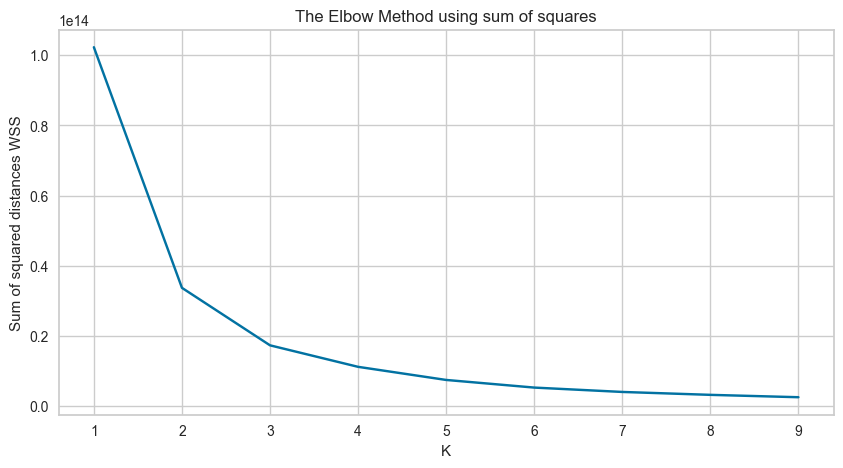

In [22]:
SS=[]
for i in range(1,10):
    model = KMeans(n_clusters=i, init='k-means++',random_state=40)
    model.fit(group_by_grid)
    #Attribute inertia_ gives sum of squared distances of samples to their closest cluster center
    SS.append(model.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,10), SS, 'bx-') 

plt.xlabel('K') 
plt.ylabel('Sum of squared distances WSS') 
plt.title('The Elbow Method using sum of squares')
plt.show()



C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10),
                 timings=False)>

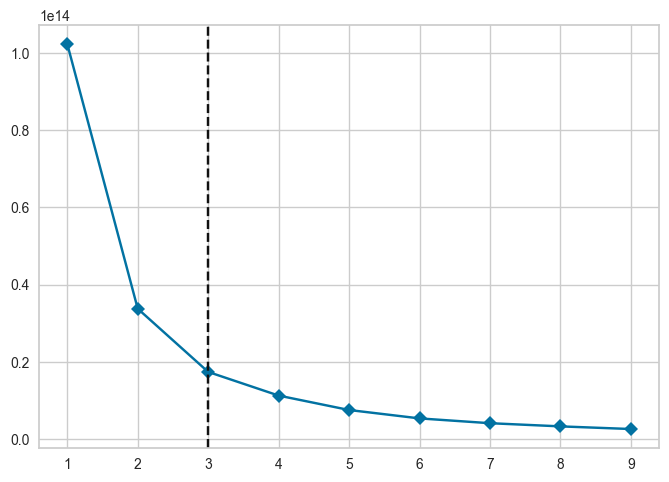

In [8]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model , k=(1,10) , timings = False)
visualizer.fit(group_by_grid)
visualizer.show

In [23]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(group_by_grid)
y_pred

C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
df_cluster = group_by_grid.copy()
df_cluster['df_cluster'] = km.labels_
df_cluster['df_cluster'].unique()

array([0, 2, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


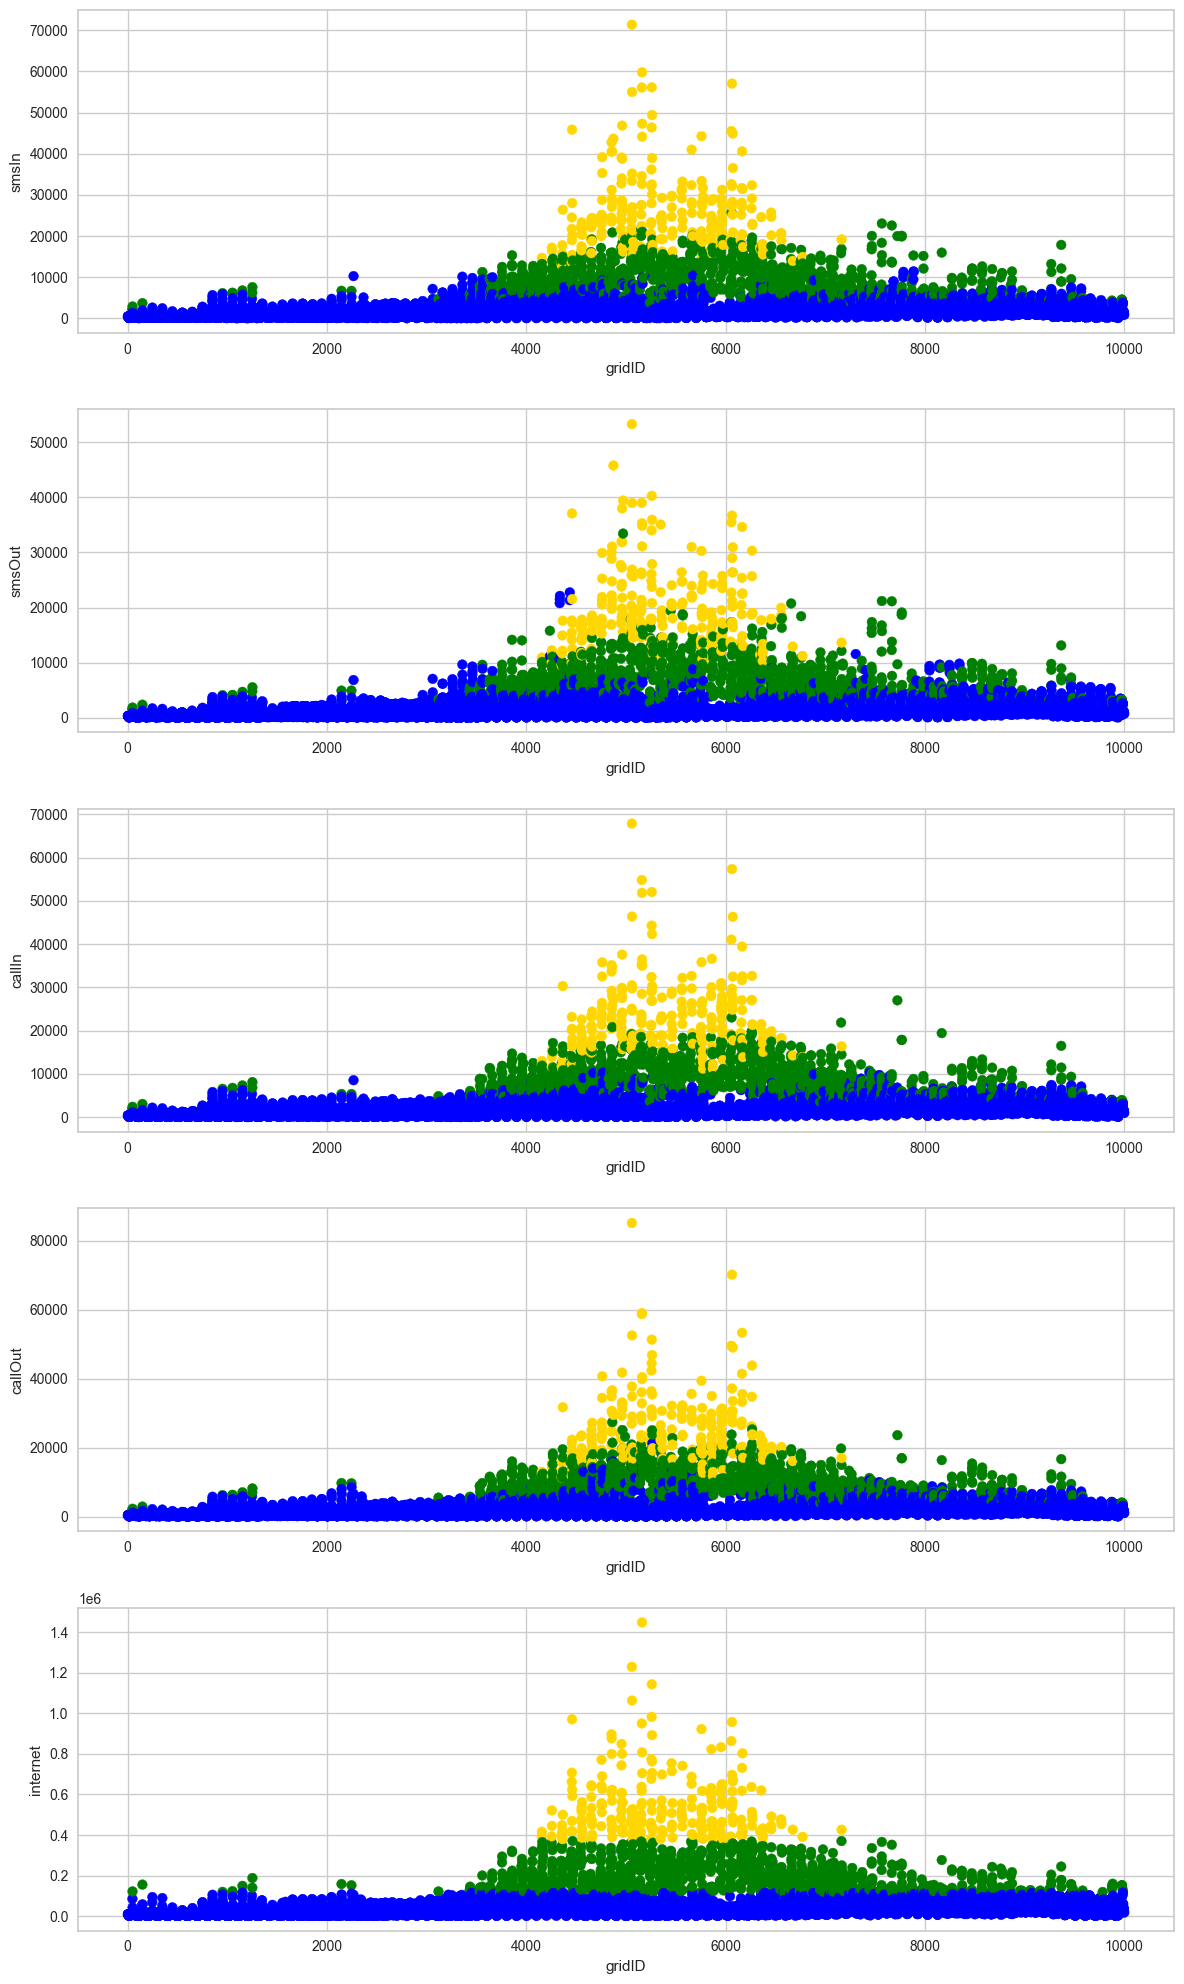

In [28]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
colors = ['blue', 'gold', 'green'] # Define colors for each cluster label
df_cluster['Color'] = df_cluster['df_cluster'].map(lambda p: colors[p])

for idx, column in enumerate(group_by_grid.columns[1:]):
    axs[idx].scatter(group_by_grid['gridID'], group_by_grid[column], c=df_cluster['Color']) # Use df_cluster['Color'] to color the points
    axs[idx].set_xlabel("gridID")
    axs[idx].set_ylabel(column)
    axs[idx].legend()
    
plt.tight_layout()
plt.show()

In [29]:

group_by_hour = group_by(data,['hour'],{'countryCode','gridID'})

group_by_hour.reset_index(inplace=True)
group_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_6076\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,hour,smsIn,smsOut,callIn,callOut,internet
0,0,3.774190e+05,4.267782e+05,1.582120e+05,1.796563e+05,1.841424e+07
1,1,1.406147e+05,1.759096e+05,6.477452e+04,7.649977e+04,9.890929e+06
2,2,6.026720e+04,7.962081e+04,2.989973e+04,3.690775e+04,4.675173e+06
3,3,3.307352e+04,4.620415e+04,1.676145e+04,2.497273e+04,2.599539e+06
4,4,2.301863e+04,3.774572e+04,1.405202e+04,2.101486e+04,2.044447e+06
5,5,2.538436e+04,4.819004e+04,1.845846e+04,2.584960e+04,2.676302e+06
6,6,1.158205e+05,1.779290e+05,7.506976e+04,9.392184e+04,8.385977e+06
7,7,5.611339e+05,6.376583e+05,4.012037e+05,4.787758e+05,1.927355e+07
8,8,1.479581e+06,1.132213e+06,1.162847e+06,1.353500e+06,2.759281e+07
9,9,1.745172e+06,1.367167e+06,1.917837e+06,2.201295e+06,3.145982e+07


C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

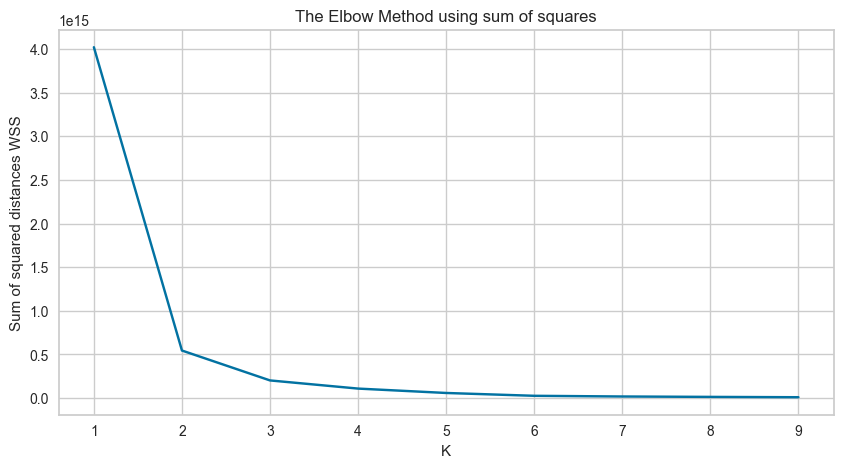

In [31]:
SS=[]
for i in range(1,10):
    model = KMeans(n_clusters=i, init='k-means++',random_state=40)
    model.fit(group_by_hour)
    #Attribute inertia_ gives sum of squared distances of samples to their closest cluster center
    SS.append(model.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,10), SS, 'bx-') 

plt.xlabel('K') 
plt.ylabel('Sum of squared distances WSS') 
plt.title('The Elbow Method using sum of squares')
plt.show()



In [33]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(group_by_hour)
y_pred

C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [34]:
df_cluster = group_by_hour.copy()
df_cluster['df_cluster'] = km.labels_
df_cluster['df_cluster'].unique()

array([1, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


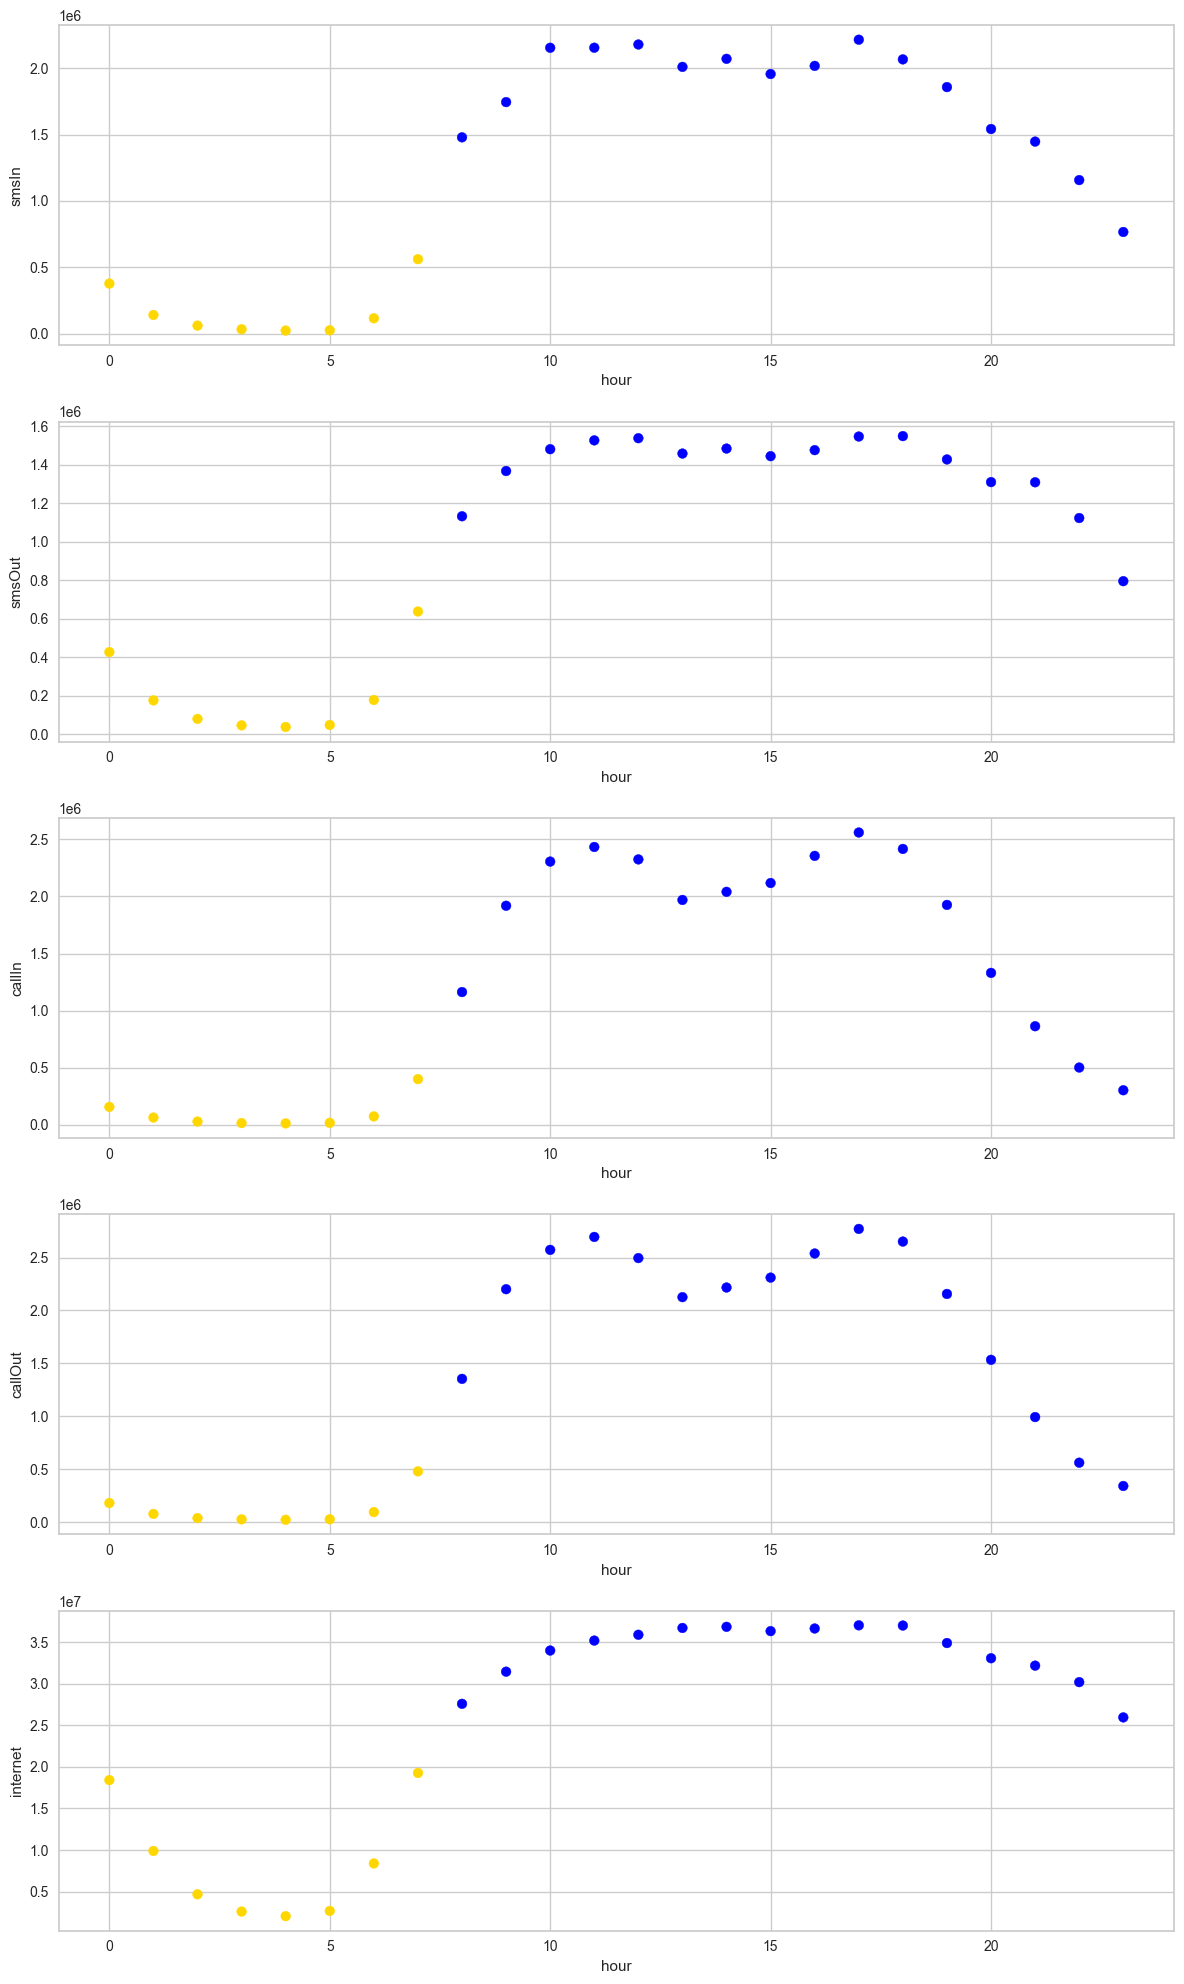

In [38]:



fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
colors = ['blue', 'gold'] # Define colors for each cluster label
df_cluster['Color'] = df_cluster['df_cluster'].map(lambda p: colors[p])

for idx, column in enumerate(group_by_hour.columns[1:]):
    axs[idx].scatter(group_by_hour['hour'], group_by_hour[column], c=df_cluster['Color']) # Use df_cluster['Color'] to color the points
    axs[idx].set_xlabel("hour")
    axs[idx].set_ylabel(column)
    axs[idx].legend()
    
plt.tight_layout()
plt.show()

